In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

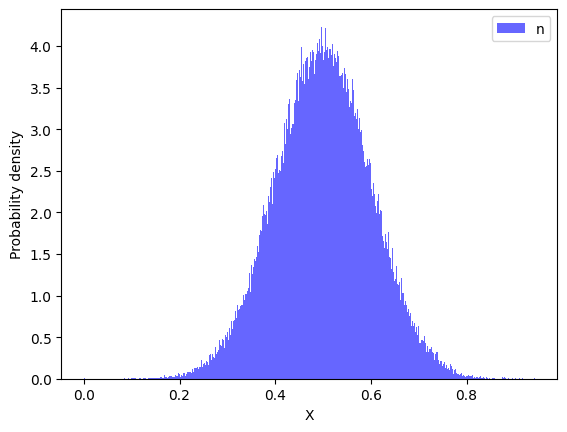

In [3]:
#此cell生成一個常態分佈圖，由1000000筆資料組成，在之後幫人建立class時從此常態分布中選取一個值當作此人智商，並為了方便後續計算將此常態分布控制在0~1區間內

def restrict_distance(normal, mu, sigma): #限制常態分布範圍(+-5標準差內)並轉成0~1區間內的值
    upper_bound = mu + 5 * sigma
    under_bound = mu - 5 * sigma
    new_normal = []
    for num in normal:
        if abs(num) < under_bound:
            num = under_bound
        if abs(num) > upper_bound:
            num = upper_bound
        num = (num - under_bound) / (upper_bound - under_bound)
        new_normal.append(num)
    return new_normal



people_num = 100000
int_mu = 100
int_sigma = 15

intelligent_normal_distribution = [random.gauss(int_mu, int_sigma) for i in range(people_num)]
int_normal_distribution_edit = restrict_distance(intelligent_normal_distribution, int_mu, int_sigma)

#繪出此分布圖，觀察是否真的為常態分布
plt.hist(int_normal_distribution_edit, bins=500, density=True, alpha=0.6, color='b')
plt.xlabel('X')
plt.ylabel('Probability density')
plt.legend('normal random variable')
plt.show()

In [4]:
#此cell設計2個class:person, event，並設計一些最後察看結果的輸出function，想一些財產分布圖、82法則驗證等等
class Person:
  def __init__(self, normal_distribution, region, years):
    self.intell = normal_distribution
    self.locate = [random.randint(0, region), random.randint(0, region)]
    self.money = 100
    self.hist = [self.money]
    self.luck_times = 0
    self.unluck_times = 0
    self.good_event_years = [0] * years
    self.bad_event_years = [0] * years

  def update_location(self, new_location):
    self.locate = new_location

  def change_money(self, event, year):
    if event == "good":
      U = random.random()
      self.luck_times += 1
      self.good_event_years[year] += 1
      if U < self.intell:
        self.money = self.money * 2
        if self.money == 0:
          self.money = 1
    else:
      self.unluck_times += 1
      self.bad_event_years[year] += 1
      self.money = math.floor(self.money / 2)

  def update_hist(self, year):
    self.hist.append(self.money)

  def plot_money_history(self):  #繪製此人每年的財產變化
    years = np.arange(len(self.hist))
    plt.plot(years, self.hist)
    plt.xlabel("Time")
    plt.ylabel("Money")
    plt.title("Money Change Over Time")
    plt.show()

  def plot_event_distribution(self):  #繪製此人每年遇到的好/壞事件量
    years = np.arange(1, len(self.hist))
    plt.plot(years, self.good_event_years, marker='o', label='Good Events')
    plt.plot(years, self.bad_event_years, marker='o', label='Bad Events')
    plt.xlabel("Year")
    plt.ylabel("Number of Events")
    plt.title("Distribution of Good and Bad Events Over Years")
    plt.legend()
    plt.show()

class Event:
  def __init__(self, region):
      self.locate = [random.randint(0, region), random.randint(0, region)]
      self.good_or_bad = random.choice(["good", "bad"])
  def update_location(self):
      self.locate = [random.randint(0, 100), random.randint(0, 100)]



def plot_money_distribution(final_money_distribution): #繪製最後全部人的資產分布圖
    plt.hist(final_money_distribution, bins=20, edgecolor='black')
    plt.xlabel("Money")
    plt.ylabel("Number of People")
    plt.title("Money Distribution After Few Years")
    plt.show()

def rule_82(final_money_distribution): #查看82法則相關數據資料
  sorted_money = sorted(final_money_distribution)

  bottom_80_percent = int(0.8 * num_people)
  bottom_80_money = sorted_money[:bottom_80_percent]
  avg_bottom_80 = np.mean(bottom_80_money)
  median_bottom_80 = np.median(bottom_80_money)
  print("TOP 80% Poorest People:")
  print("Average Money:", avg_bottom_80)
  print("Median Money:", median_bottom_80)

  top_20_percent = int(0.2 * num_people)
  top_20_money = sorted_money[-top_20_percent:]
  avg_top_20 = np.mean(top_20_money)
  median_top_20 = np.median(top_20_money)
  print("\nTOP 20% Richest People:")
  print("Average Money:", avg_top_20)
  print("Median Money:", median_top_20)

def simulate(num_people, num_events, region, years):
  people = [Person(random.choice(int_normal_distribution_edit), region, years) for _ in range(num_people)]
  events = [Event(region) for _ in range(num_events)]
  for year in range(years):
    for person in people:
      for event in events:
        distance = np.linalg.norm(np.array(person.locate) - np.array(event.locate))
        if distance <= 1:
          person.change_money(event.good_or_bad, year)
        event.update_location()
      person.update_hist(year)
  return people



In [21]:
#程式運行
num_people = 1000
num_events = 1000
region = 100
years = 40
people = simulate(num_people, num_events, region, years)
print("finish")

finish


The most intelligest: 0.8037649800260995
The most unintelligest: 0.16921063335086853


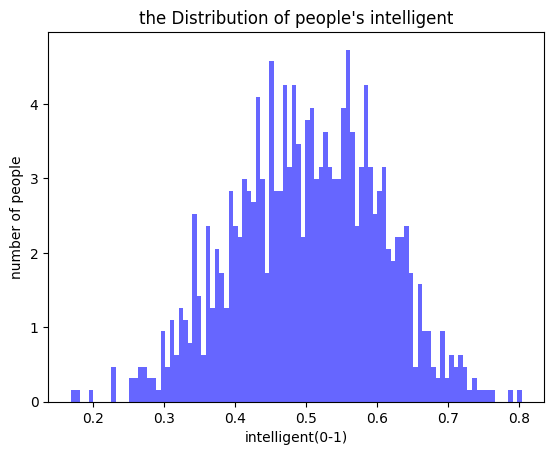

In [22]:
#繪製智力分布圖
intelligest_person = max(people, key=lambda x: x.intell)
unintelligest_person = min(people, key=lambda x: x.intell)
print("The most intelligest:", intelligest_person.intell)
print("The most unintelligest:", unintelligest_person.intell)
intell_distribution = [person.intell for person in people]
plt.hist(intell_distribution, bins=100, density=True, alpha=0.6, color='b')
plt.xlabel('intelligent(0-1)')
plt.ylabel('number of people')
plt.title("the Distribution of people's intelligent")
plt.show()

Richest People

money: 51200
intelligent: 0.7886545391319753
number of good events: 15
number of bad events: 3


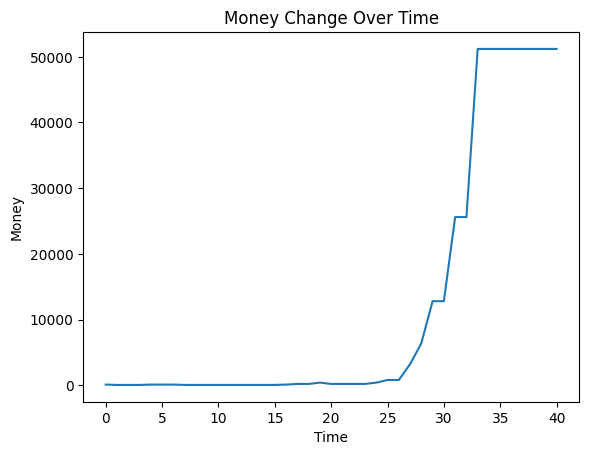

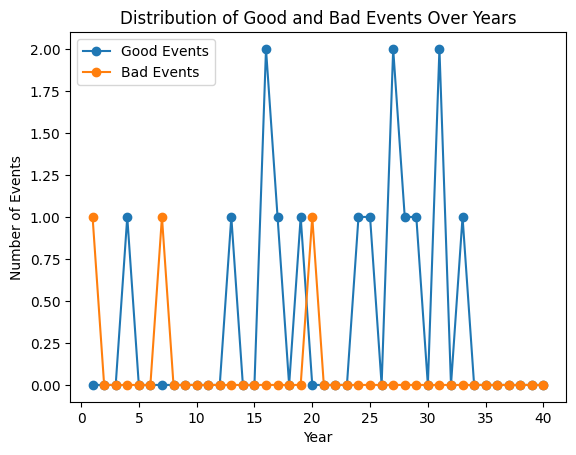

In [23]:
#繪出最有錢人分布圖
richest_person = max(people, key=lambda x: x.money)
print("Richest People\n")
print("money:", richest_person.money)
print("intelligent:", richest_person.intell)
print("number of good events:", richest_person.luck_times)
print("number of bad events:", richest_person.unluck_times)
richest_person.plot_money_history()
richest_person.plot_event_distribution()

Poorest People

money: 0
intelligent: 0.34063749482545813
number of good events: 6
number of bad events: 21


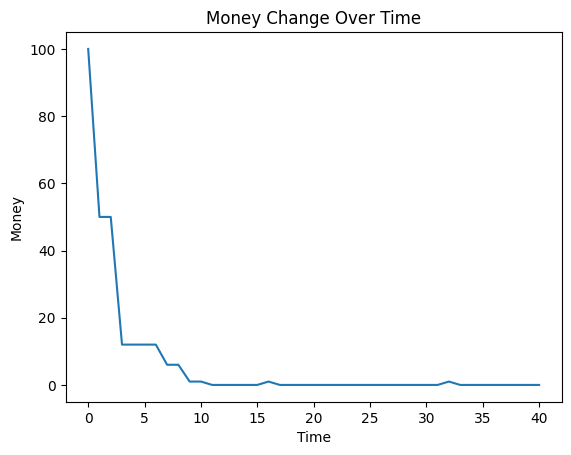

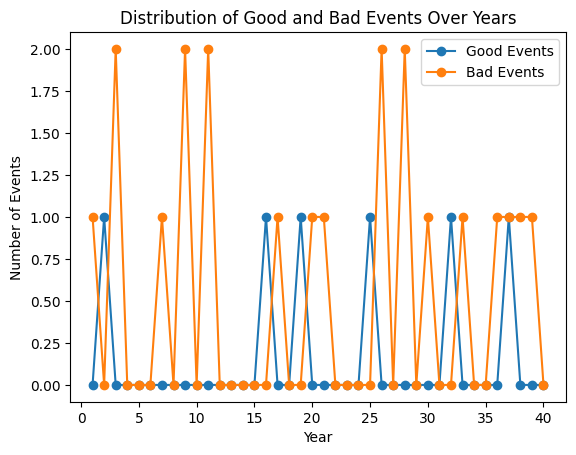

In [24]:
#繪出最貧窮人分布圖
min_money = 100
unluck_times = 0
choose_index = 0
for i in range(len(people)) :
  if people[i].money < min_money:
    min_money = people[i].money
    unluck_times = people[i].unluck_times
    choose_index = i
  elif people[i].money == min_money and people[i].unluck_times > unluck_times:
    min_money = people[i].money
    unluck_times = people[i].unluck_times
    choose_index = i

poorest_person = people[choose_index]
#poorest_person = min(people, key=lambda x: x.money)
#poorest_person = max(people, key=lambda x: x.unluck_times)
print("Poorest People\n")
print("money:", poorest_person.money)
print("intelligent:", poorest_person.intell)
print("number of good events:", poorest_person.luck_times)
print("number of bad events:", poorest_person.unluck_times)
poorest_person.plot_money_history()
poorest_person.plot_event_distribution()

Smartest People

money: 24
intelligent: 0.8037649800260995
number of good events: 13
number of bad events: 11


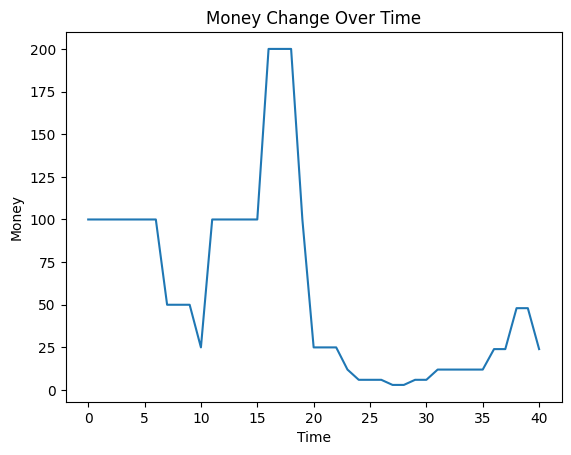

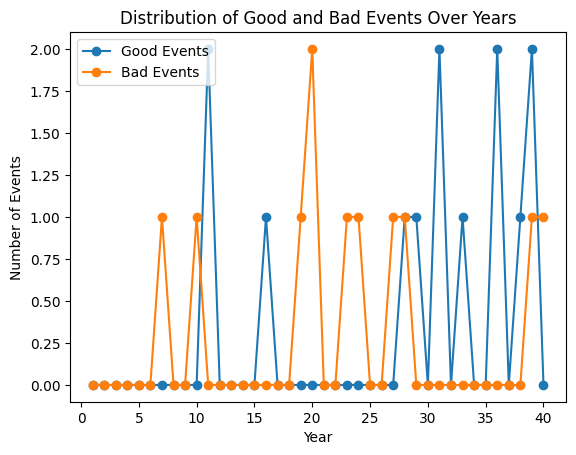

In [25]:
#繪出最高智商的人相關資訊
intelligest_person = max(people, key=lambda x: x.intell)
print("Smartest People\n")
print("money:", intelligest_person.money)
print("intelligent:", intelligest_person.intell)
print("number of good events:", intelligest_person.luck_times)
print("number of bad events:", intelligest_person.unluck_times)
intelligest_person.plot_money_history()
intelligest_person.plot_event_distribution()

Unsmartest People

money: 2
intelligent: 0.16921063335086853
number of good events: 13
number of bad events: 7


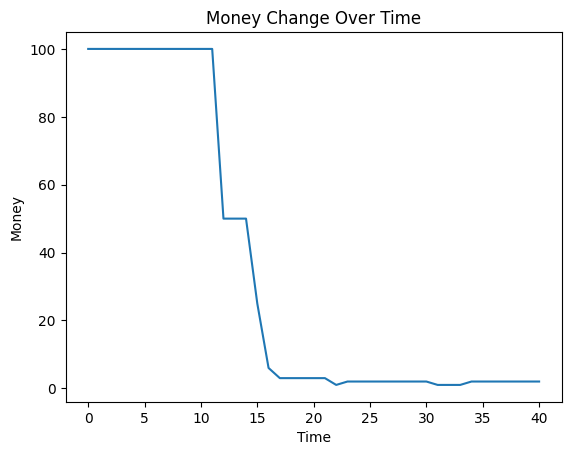

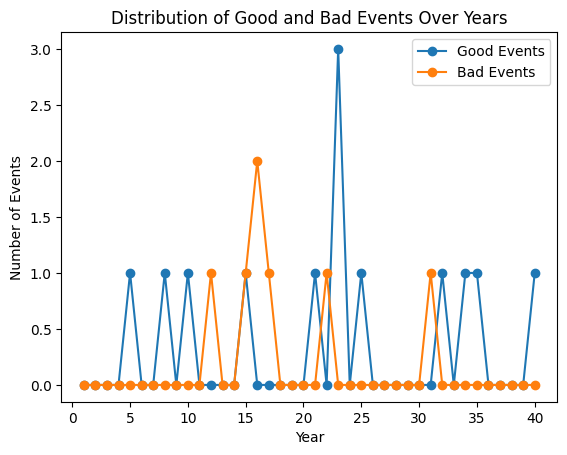

In [26]:
#繪出最低智商的人相關資訊
unintelligest_person = min(people, key=lambda x: x.intell)
print("Unsmartest People\n")
print("money:", unintelligest_person.money)
print("intelligent:", unintelligest_person.intell)
print("number of good events:", unintelligest_person.luck_times)
print("number of bad events:", unintelligest_person.unluck_times)
unintelligest_person.plot_money_history()
unintelligest_person.plot_event_distribution()

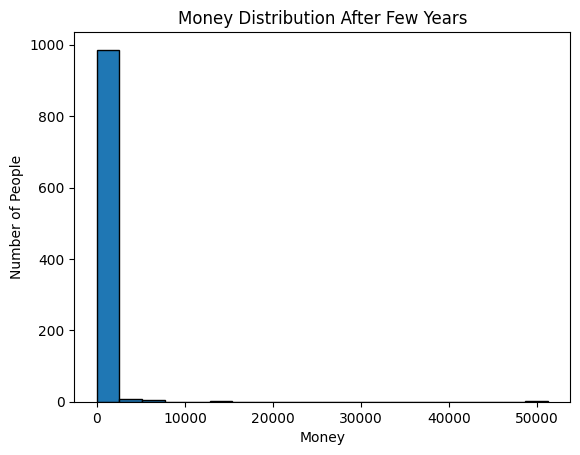

In [27]:
#繪出全部人最後資產分布圖
final_money_distribution = [person.money for person in people]
plot_money_distribution(final_money_distribution)

In [28]:
#查看82法則
rule_82(final_money_distribution)

TOP 80% Poorest People:
Average Money: 4.8375
Median Money: 2.0

TOP 20% Richest People:
Average Money: 773.585
Median Money: 100.0
